In [1]:
%%html
<style>
.container{width:100%}
</style>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate
%matplotlib inline

In [3]:
def Newton_Raphson(B, b, phy):
    max_iter = 1000
    tol = 1e-6
    xi = np.random.rand(b.shape[0])
    for i in range(max_iter):
        F, F_p = F_prime(B, b, xi, phy)
        x_old = xi
        xi = xi - np.linalg.inv(F_p) @ F
        if np.linalg.norm(xi - x_old) < tol:
            break
    return xi

In [4]:
def F_prime(B, b, xi, phy):
    m = B.shape[0]
    Bx = B @ xi
    temp1 = Bx - b
    temp2 = xi - phy
    temp = np.stack((temp1, temp2), axis = 1)
    F = np.min(temp, axis = 1)
    F_p= np.eye(m)
    index = temp1 < temp2
    F_p[index, :] = B[index, :]
    return F, F_p

In [5]:
def Implicit(K, S_max, S0, T, sigma, r, N, M):
    def payoff(K, x):
        temp = np.zeros(x.shape)
        temp = np.stack((K-x, temp), axis = 1)
        return np.max(temp, axis=1)
    
    h = S_max/(M+1)
    delta_t = T/N
    x = np.arange(M+1) * h
    t = np.arange(N+1) * delta_t
    
    x2 = x ** 2
    sigma2 = sigma * sigma
    h2 = h * h
    
    a = -sigma2 * x2 /(2 * h2)
    b = sigma2 * x2 / h2 + r * x / h + r
    c = -sigma2 * x2/(2 * h2)-r * x / h
    
    A = np.diag(b)
    for i in range(1, M+1):
        A[i, i-1] = a[i]
    for i in range(M):
        A[i, i+1] = c[i]
        
    phy = payoff(K, x)
    P = phy
    B = np.eye(M+1) + delta_t * A
    
    for i in range(1, N):
        b = P
        P = Newton_Raphson(B, b, phy)
        F, _ = F_prime(B, b, P, phy)

    f=interpolate.interp1d(x,P,kind="cubic")
    print(f(S0))
    return x, P

In [6]:
def Implicit_plot_help(x, P, M, filename):
    plt.figure(figsize=(9,6))
    plt.title("Implicit Euler Method, M={}".format(M))
    plt.plot(x, P)
    plt.xlabel('S')
    plt.ylabel('Option price at time 0')
    f=interpolate.interp1d(x,P,kind="cubic")
    plt.scatter(S0, f(S0), c = 'r')
    plt.savefig(filename + '.jpg')
    plt.show()

5.358299011146998


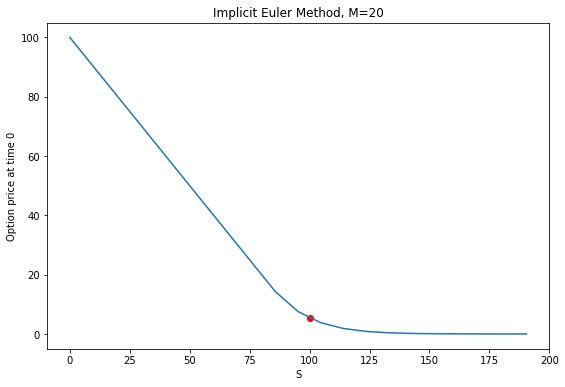

In [7]:
K = 100
S_max = 200
T = 1
sigma = 0.2
r = 0.1
S0 = 100
N = 20
M = 20
xx, Price = Implicit(K, S_max, S0, T, sigma, r, N, M)
Implicit_plot_help(xx, Price, M, 'Implicit_M20')

4.9952974379564585


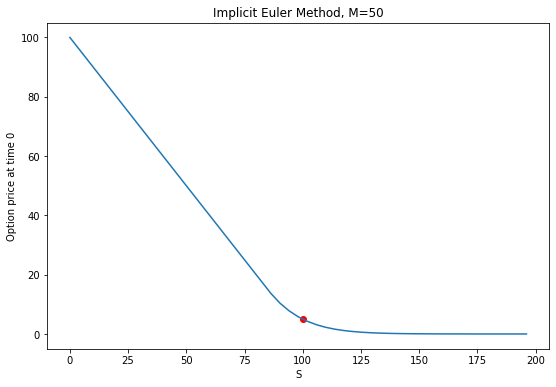

In [8]:
K = 100
S_max = 200
T = 1
sigma = 0.2
r = 0.1
S0 = 100
N = 20
M = 50
xx, Price = Implicit(K, S_max, S0, T, sigma, r, N, M)
Implicit_plot_help(xx, Price, M, 'Implicit_M50')

2.4345002599248176
1.7581182786017646
2.1491431716999383
1.8912762197669004
1.7679148862646148
1.737647142173167
1.7273083217377871


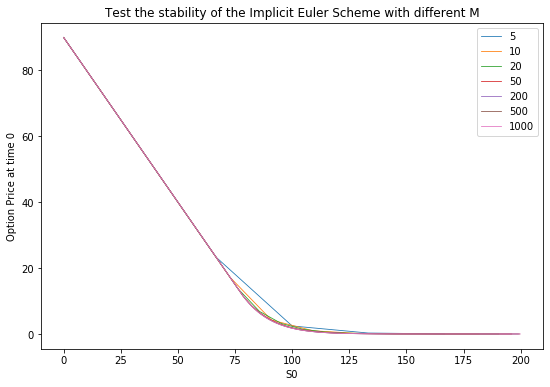

In [32]:
K = 90
S_max = 200
T = 1
sigma = 0.2
r = 0.1
S0 = 100
N = [5,10, 20, 50, 200, 500, 1000]
M = [5,10, 20, 50, 200, 500, 1000]
plt.figure(figsize=(9,6))
plt.title('Test the stability of the Implicit Euler Scheme with different M')
for i in range(len(M)):
    xx, Price = Implicit(K, S_max, S0, T, sigma, r, N[i], M[i])
    plt.plot(xx, Price, linewidth = '.8')
plt.legend(M)
plt.xlabel('S0')
plt.ylabel('Option Price at time 0')
plt.savefig('Explicit_stable_NM.jpg')
plt.show()

2.8602413040299064
1.9127386351136806
2.149143171210451
1.8321915585552264
1.6851247250627404
1.6506246399720945
1.638903958140443


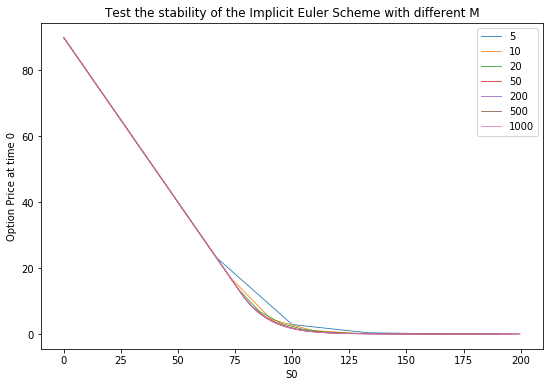

In [13]:
K = 90
S_max = 200
T = 1
sigma = 0.2
r = 0.1
S0 = 100
N = 20
M = [5,10, 20, 50, 200, 500, 1000]
plt.figure(figsize=(9,6))
plt.title('Test the stability of the Implicit Euler Scheme with different M')
for m in M:
    xx, Price = Implicit(K, S_max, S0, T, sigma, r, N, m)
    plt.plot(xx, Price, linewidth = '.8')
plt.legend(M)
plt.xlabel('S0')
plt.ylabel('Option Price at time 0')
plt.savefig('Explicit_stable.jpg')
plt.show()

In [26]:
def Implicit_converge(K, S_max, S0, T, sigma, r, N, M):
    def payoff(K, x):
        temp = np.zeros(x.shape)
        temp = np.stack((K-x, temp), axis = 1)
        return np.max(temp, axis=1)
    
    h = S_max/(M+1)
    delta_t = T/N
    x = np.arange(M+1) * h
    t = np.arange(N+1) * delta_t
    
    x2 = x ** 2
    sigma2 = sigma * sigma
    h2 = h * h
    
    a = -sigma2 * x2 /(2 * h2)
    b = sigma2 * x2 / h2 + r * x / h + r
    c = -sigma2 * x2/(2 * h2)-r * x / h
    
    A = np.diag(b)
    for i in range(1, M+1):
        A[i, i-1] = a[i]
    for i in range(M):
        A[i, i+1] = c[i]
        
    phy = payoff(K, x)
    P = phy
    B = np.eye(M+1) + delta_t * A
    
    for i in range(1, N):
        b = P
        P = Newton_Raphson(B, b, phy)
        F, _ = F_prime(B, b, P, phy)

    f=interpolate.interp1d(x,P,kind="cubic")
    return f(S0)

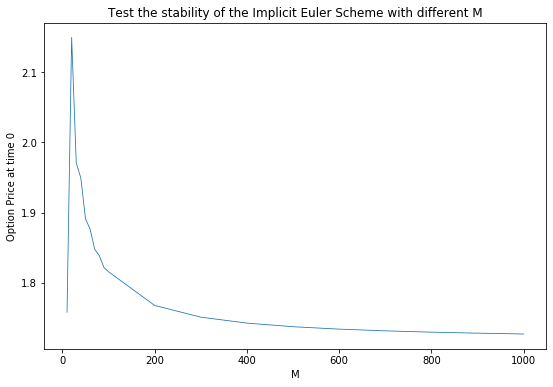

In [30]:
K = 90
S_max = 200
T = 1
sigma = 0.2
r = 0.1
S0 = 100
N = list(np.arange(10, 100, 10)) + list(np.arange(100, 1100, 100))
M = list(np.arange(10, 100, 10)) + list(np.arange(100, 1100, 100))
P = []
plt.figure(figsize=(9,6))
plt.title('Test the stability of the Implicit Euler Scheme with different M')
for i in range(len(M)):
    P.append(Implicit_converge(K, S_max, S0, T, sigma, r, N[i], M[i]))
plt.plot(M, P, linewidth = '.8')
plt.xlabel('M')
plt.ylabel('Option Price at time 0')
plt.savefig('Explicit_M_curve.jpg')
plt.show()